In [26]:
import numpy as np
import os
import xmltodict
import glob
import cv2
from tqdm import tqdm

In [3]:
# Read sequence:
chokepoint_dir = "/home/oole/Data/Chokepoint"
output_dir = "/home/oole/Data/Chokepoint/faces"

In [9]:
def ann_to_bbox(annotation):
        obj_ann = annotation['object']
        bbox = obj_ann['bndbox']
        x1 = bbox['xmin']
        y1 = bbox['ymin']
        x2 = bbox['xmax']
        y2 = bbox['ymax']
        box = [x1, y1, x2, y2]
        out_bbox = {
            'xmin': int(x1),
            'xmax' : int(x2),
            'ymin' : int(y1),
            'ymax' : int(y2)
        }
        return out_bbox

def ann_to_filepath(annotation):
    sub_path = annotation['folder']
    fname = annotation['filename']
    full_path = os.path.join(chokepoint_dir, sub_path, fname + ".jpg")
    return full_path

def ann_to_fname(annotation):
    fname = annotation['filename']
    return fname

In [16]:
# collect all folders containing annotations
subset = "test"
subset_path = os.path.join(chokepoint_dir, "annotation", "G1", subset)
paths = sorted(glob.glob(subset_path + "*/*/*/*"))
vid_names_1 = [path for path in paths if "xml" not in path and "seq" in path]
vid_names_1 = ["/".join(v.split("/")[-3:]) for v in vid_names_1]
paths = sorted(glob.glob(subset_path + "*/*/*"))
vid_names_2 = [path for path in paths if "xml" not in path and "seq" in path]
vid_names_2 = ["/".join(v.split("/")[-2:]) for v in vid_names_2]
vid_names = list(vid_names_2 + vid_names_1)

example = vid_names[0]
example
len(vid_names)
for vid in vid_names:
    print(vid)

P1E_S3/P1E_S3_C3_seq_1
P1E_S3/P1E_S3_C3_seq_10
P1E_S3/P1E_S3_C3_seq_11
P1E_S3/P1E_S3_C3_seq_12
P1E_S3/P1E_S3_C3_seq_13
P1E_S3/P1E_S3_C3_seq_14
P1E_S3/P1E_S3_C3_seq_15
P1E_S3/P1E_S3_C3_seq_16
P1E_S3/P1E_S3_C3_seq_17
P1E_S3/P1E_S3_C3_seq_18
P1E_S3/P1E_S3_C3_seq_19
P1E_S3/P1E_S3_C3_seq_2
P1E_S3/P1E_S3_C3_seq_20
P1E_S3/P1E_S3_C3_seq_21
P1E_S3/P1E_S3_C3_seq_22
P1E_S3/P1E_S3_C3_seq_23
P1E_S3/P1E_S3_C3_seq_24
P1E_S3/P1E_S3_C3_seq_25
P1E_S3/P1E_S3_C3_seq_3
P1E_S3/P1E_S3_C3_seq_4
P1E_S3/P1E_S3_C3_seq_5
P1E_S3/P1E_S3_C3_seq_6
P1E_S3/P1E_S3_C3_seq_7
P1E_S3/P1E_S3_C3_seq_8
P1E_S3/P1E_S3_C3_seq_9
P1E_S4/P1E_S4_C1_seq_26
P1E_S4/P1E_S4_C1_seq_27
P1E_S4/P1E_S4_C1_seq_28
P1E_S4/P1E_S4_C1_seq_29
P1E_S4/P1E_S4_C1_seq_30
P1E_S4/P1E_S4_C1_seq_31
P1E_S4/P1E_S4_C1_seq_32
P1E_S4/P1E_S4_C1_seq_33
P1E_S4/P1E_S4_C1_seq_34
P1E_S4/P1E_S4_C1_seq_35
P1E_S4/P1E_S4_C1_seq_36
P1E_S4/P1E_S4_C1_seq_37
P1E_S4/P1E_S4_C1_seq_38
P1E_S4/P1E_S4_C1_seq_39
P1E_S4/P1E_S4_C1_seq_40
P1E_S4/P1E_S4_C1_seq_41
P1E_S4/P1E_S4_C1_seq_42
P

In [28]:
# Write all faces annotations to individual files
ringnet_img_size = 224
for sequence_dir in tqdm(vid_names):
#     print("sequence_dir: {}".format(sequence_dir))
    ann_path = os.path.join(chokepoint_dir, "annotation/G1/", subset, sequence_dir)
    head_roi_path = os.path.join(chokepoint_dir, "face_data/G1/", subset, sequence_dir)
#     print(ann_path)
#     print(head_roi_path)
    if not os.path.isdir(head_roi_path):
        os.makedirs(head_roi_path)
    ann_files = sorted(glob.glob(ann_path + "/*.xml"))
    for ann_file in ann_files:
# #         print("----start----")
        ann = xmltodict.parse(open(ann_file).read())['annotation']
        bbox = ann_to_bbox(ann)
        img_file_path = ann_to_filepath(ann)
        img = cv2.imread(img_file_path)
        bb_size_y = bbox['ymax'] - bbox['ymin']
        bb_size_x = bbox['xmax'] - bbox['xmin']
        bb_expand = 0
        size_diff_y = ringnet_img_size - bb_size_y
        size_diff_x = ringnet_img_size - bb_size_x
#         print('bb-bb_size_y: {}'.format(bb_size_y))
#         print('bb-bb_size_x: {}'.format(bb_size_x))
#         print("size_diff: {}".format(size_diff))
        bb_expand_y = size_diff_y // 2
        bb_expand_x = size_diff_x // 2
        extra_expand_y = 0
        if size_diff_y %2 != 0:
            extra_expand_y = 1
        else:
            extra_expand_y= 0
        extra_expand_x = 0
        if size_diff_x %2 != 0:
            extra_expand_x = 1
        else:
            extra_expand_x = 0
        max_idx_y = bbox['ymax']+bb_expand_y + extra_expand_y
        min_idx_y = bbox['ymin']-bb_expand_y
        if max_idx_y > 600:
            ymax = 600
            ymin = 600 - ringnet_img_size
        else:
            ymax = max_idx_y
            ymin = min_idx_y
        
        max_idx_x = bbox['xmax']+bb_expand_x + extra_expand_x
        min_idx_x = bbox['xmin']-bb_expand_x
        if max_idx_x > 800:
            xmax = 800
            xmin = 800 - ringnet_img_size
        elif min_idx_x < 0:
            xmin = 0
            xmax = ringnet_img_size
        else:
            xmax = max_idx_x
            xmin = min_idx_x
#         print("ymin: {}, ymax: {}, xmin: {} ,xmax:{}".format(ymin, ymax, xmin, xmax))
        head_roi = img[
            ymin:ymax,
            xmin:xmax]
#         print(head_roi.shape)
        # bb_ymax + bb_expandy + bb_extra_expand_y < 600!
        file_name = ann_to_fname(ann) + ".jpg"
        assert head_roi.shape == (224, 224, 3), "{} -, head_roid: {}, max_idx_x {}".format(os.path.join(head_roi_path, file_name), head_roi.shape, max_idx_x)
        file_name = ann_to_fname(ann) + ".jpg"
#         print("filename: {}".format(file_name))
        file_path = os.path.join(head_roi_path, file_name)
#         print("file_path: {}".format(file_path))
        cv2.imwrite(file_path, head_roi)
#         print("done")


100%|██████████| 216/216 [01:49<00:00,  1.97it/s]


In [32]:
# Create and save meshes using ringnet:
import tensorflow._api.v2.compat.v1 as tf
from psbody.mesh import Mesh
from skimage import io
import time


face_data_path = os.path.join(chokepoint_dir, "face_data")
first_batch_img_paths = sorted(glob.glob(face_data_path + "*/*/*/*/*/*"))
first_batch_img_paths = [path for path in first_batch_img_paths if ".jpg" in path]
# only jpgs
second_batch_img_paths = sorted(glob.glob(face_data_path + "*/*/*/*/*/*/*"))
second_batch_img_paths = [path for path in second_batch_img_paths if ".jpg" in path]

all_img_paths = first_batch_img_paths + second_batch_img_paths
assert len(all_img_paths) == len(np.unique(all_img_paths)), "inconsistency with image paths! {} != {}".format(len(all_img_paths), en(np.unique(all_img_paths)))
# print(len(all_img_paths))
# print(len(np.unique(all_img_paths)))

template_mesh = Mesh(filename="/home/oole/git/ma/coma/impl/data/template.obj")
# viewer = MeshViewer()
load_path = "/mnt/storage/Msc/RingNet/model/ring_6_68641"
model_path = load_path + ".meta"

mesh_path = os.path.join(chokepoint_dir, "mesh_annotation")
print("mesh_path: {}".format(mesh_path))
with tf.Session() as sess:
    graph = sess.graph
    saver = tf.compat.v1.train.import_meta_graph(model_path)
    saver.restore(sess, load_path)
    vertices = graph.get_tensor_by_name(u'Flamenetnormal_2/Add_9:0')
    params = graph.get_tensor_by_name(u'add_2:0')
    image_input = graph.get_tensor_by_name(u'input_images:0')
    
    i = 0
    for img_path in tqdm(all_img_paths):
        sub_path_to_mesh = img_path.split(chokepoint_dir)[-1].split("/face_data")[-1].split(".jpg")[0][1:]
        sub_path_split = sub_path_to_mesh.split("/")
        fname = sub_path_split[-1] + ".npy"
        sub_path = ("/").join(sub_path_split[:-1])
        full_path =os.path.join(mesh_path, sub_path)
        if not os.path.exists(full_path):
            os.makedirs(full_path)
        full_path_to_mesh = os.path.join(full_path, fname)
        
        crop, proc_param, img = preprocess_image(img_path)
        face_image = np.expand_dims(crop, axis=0)
        # input_image = np.expand_dims(face_image, axis=0)
        fetch_dict = {'vertices': vertices,
                     'parameters': params}
        feed_dict = {
                image_input: face_image
            }
        res = sess.run(fetch_dict, feed_dict)
        verts = res['vertices'][0]
#         flame_parameters = res['parameters']
#         viewer.set_dynamic_meshes([Mesh(v=verts, f=template_mesh.f)])
#         print(full_path_to_mesh)
        np.save(full_path_to_mesh, verts)
#         time.sleep(5)
        

mesh_path: /home/oole/Data/Chokepoint/mesh_annotation
INFO:tensorflow:Restoring parameters from /mnt/storage/Msc/RingNet/model/ring_6_68641


100%|██████████| 37315/37315 [05:48<00:00, 106.97it/s]


In [5]:
example = vid_names[0]
ann_path = os.path.join(chokepoint_dir, "annotation/G1/train", example)
ann_files = sorted(glob.glob(ann_path + "/*.xml"))
first_ann_file = ann_files[0]
first_ann = xmltodict.parse(open(first_ann_file).read())['annotation']

first_bbox = ann_to_bbox(first_ann)
first_bbox
img_file_path = ann_to_filepath(first_ann)
img_file_path
img = cv2.imread(img_file_path)

bb_size = first_bbox['ymax'] - first_bbox['ymin']
bb_expand = 0
size_diff = ringnet_size - bb_size
print('bb-size: {}'.format(bb_size))
print("size_diff: {}".format(size_diff))
bb_expand = size_diff // 2
extra_expand = 0
if size_diff %2 != 0:
    extra_expand = 1
else:
    extra_expand= 0
head_roi = img[
    first_bbox['ymin']-bb_expand:first_bbox['ymax']+bb_expand + extra_expand,
    first_bbox['xmin']-bb_expand:first_bbox['xmax']+bb_expand + extra_expand]
# cv2.imshow("head roi", head_roi)
# cv2.waitKey(0)
print(head_roi.shape)
# cv2.imshow("head", head_roi)
# cv2.waitKey(0)
cv2.imwrite("/home/oole/test_img.jpg", head_roi)

bb-size: 69
size_diff: 155
(224, 224, 3)


True

In [31]:
# Ringnet preprocess:
def resize_img(img, scale_factor):
    new_size = (np.floor(np.array(img.shape[0:2]) * scale_factor)).astype(int)
    new_img = cv2.resize(img, (new_size[1], new_size[0]))
    # This is scale factor of [height, width] i.e. [y, x]
    actual_factor = [
        new_size[0] / float(img.shape[0]), new_size[1] / float(img.shape[1])
    ]
    return new_img, actual_factor

def scale_and_crop(image, scale, center, img_size):
    image_scaled, scale_factors = resize_img(image, scale)
    # Swap so it's [x, y]
    scale_factors = [scale_factors[1], scale_factors[0]]
    center_scaled = np.round(center * scale_factors).astype(np.int)

    margin = int(img_size / 2)
    image_pad = np.pad(
        image_scaled, ((margin, ), (margin, ), (0, )), mode='edge')
    center_pad = center_scaled + margin
    # figure out starting point
    start_pt = center_pad - margin
    end_pt = center_pad + margin
    # crop:
    crop = image_pad[start_pt[1]:end_pt[1], start_pt[0]:end_pt[0], :]
    proc_param = {
        'scale': scale,
        'start_pt': start_pt,
        'end_pt': end_pt,
        'img_size': img_size
    }

    return crop, proc_param

def preprocess_image(img_path):
    img = io.imread(img_path)
    if np.max(img.shape[:2]) != 224:
        print('Resizing so the max image size is %d..' % 224)
        scale = (float(224) / np.max(img.shape[:2]))
    else:
        scale = 1.0#scaling_factor
    center = np.round(np.array(img.shape[:2]) / 2).astype(int)
    # image center in (x,y)
    center = center[::-1]
    crop, proc_param = scale_and_crop(img, scale, center,
                                               224)
    # import ipdb; ipdb.set_trace()
    # Normalize image to [-1, 1]
    # plt.imshow(crop/255.0)
    # plt.show()
    crop = 2 * ((crop / 255.) - 0.5)

    return crop, proc_param, img

In [65]:
import tensorflow._api.v2.compat.v1 as tf
from psbody.mesh import Mesh
from skimage import io

# image_path = "/home/oole/git/projects-to-consume/RingNet/input_images/000013.jpg"
image_path = "/home/oole/Data/Chokepoint/face_data/G1/train/P2L_S2/P2L_S2_C2/P2L_S2_C2.1_seq_210/00004566.jpg"
# face_image = io.imread("/home/oole/test_img.jpg")
# face_image = io.imread(image_path)
crop, proc_param, img = preprocess_image(image_path)
face_image = np.expand_dims(crop, axis=0)
print("crop: {}".format(img.shape))
# input_image = np.expand_dims(face_image, axis=0)
load_path = "/mnt/storage/Msc/RingNet/model/ring_6_68641"
model_path = load_path + ".meta"
sess = tf.Session()
graph = None
with sess:
    graph = sess.graph
    saver = tf.compat.v1.train.import_meta_graph(model_path)
    saver.restore(sess, load_path)
    
    vertices = graph.get_tensor_by_name(u'Flamenetnormal_2/Add_9:0')
    params = graph.get_tensor_by_name(u'add_2:0')
    image_input = graph.get_tensor_by_name(u'input_images:0')
    print(vertices)
    print(image_input)
    fetch_dict = {'vertices': vertices,
                 'parameters': params}
    feed_dict = {
            image_input: face_image
        }
    res = sess.run(fetch_dict, feed_dict)


center: [112 112]
crop: (224, 224, 3)


<ipython-input-20-9e13e1ea903e>:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  center_scaled = np.round(center * scale_factors).astype(np.int)


INFO:tensorflow:Restoring parameters from /mnt/storage/Msc/RingNet/model/ring_6_68641


INFO:tensorflow:Restoring parameters from /mnt/storage/Msc/RingNet/model/ring_6_68641


Tensor("Flamenetnormal_2/Add_9:0", shape=(1, 5023, 3), dtype=float32, device=/device:GPU:*)
Tensor("input_images:0", shape=(1, 224, 224, 3), dtype=float32)


In [66]:
# template_mesh = Mesh(filename="/home/oole/git/projects-to-consume/RingNet/flame_model/FLAME_sample.ply")
template_mesh = Mesh(filename="/home/oole/git/ma/coma/impl/data/template.obj")
# verts = res['vertices']
# Mesh(v=verts, f=template_mesh.f)

In [67]:
verts = res['vertices']
flame_parameters = res['parameters']
cams = flame_parameters[0][:3]
print(cams)
viewer = MeshViewer()
viewer.set_dynamic_meshes([Mesh(v=verts[0], f=template_mesh.f)])


[5.7055864e+00 3.1828792e-03 2.2927153e-01]


In [12]:
from psbody.mesh import MeshViewer

In [1]:
renderer = SMPLRenderer(faces=template_mesh.f)

NameError: name 'SMPLRenderer' is not defined

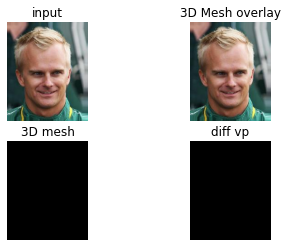

In [43]:
vertices = verts[0]
mesh = Mesh(v=verts, f=template_mesh.f)
cam_for_render, verts_shifted = get_original(proc_param, vertices, cams, img_size=img.shape[:2])
rend_img_overlay = renderer(
        verts_shifted*1.0, cam=cam_for_render, img=img, do_alpha=True)
rend_img = renderer(
        verts_shifted*1.0, cam=cam_for_render, img_size=img.shape[:2])
rend_img_vp1 = renderer.rotated(
        verts_shifted, 30, cam=cam_for_render, img_size=img.shape[:2])
import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.clf()
plt.subplot(221)
plt.imshow(img)
plt.title('input')
plt.axis('off')
plt.subplot(222)
plt.imshow(rend_img_overlay)
plt.title('3D Mesh overlay')
plt.axis('off')
plt.subplot(223)
plt.imshow(rend_img)
plt.title('3D mesh')
plt.axis('off')
plt.subplot(224)
plt.imshow(rend_img_vp1)
plt.title('diff vp')
plt.axis('off')
plt.draw()
plt.show(block=False)

In [14]:
viewer = MeshViewer()
viewer.set_dynamic_meshes([Mesh(v=verts, f=template_mesh.f)])

In [47]:
import opendr
opendr.demo('moments')

- - - - - - - - - - - <CODE> - - - - - - - - - - - -

from opendr.util_tests import get_earthmesh
from opendr.simple import * 
import numpy as np

w, h = 320, 240

m = get_earthmesh(trans=ch.array([0,0,4]), rotation=ch.zeros(3))

# Create V, A, U, f: geometry, brightness, camera, renderer
V = ch.array(m.v)
A = SphericalHarmonics(vn=VertNormals(v=V, f=m.f), 
                       components=[3.,1.,0.,0.,0.,0.,0.,0.,0.], 
                       light_color=ch.ones(3))
U = ProjectPoints(v=V, f=[300,300.], c=[w/2.,h/2.], k=ch.zeros(5),
                  t=ch.zeros(3), rt=ch.zeros(3))
rn = TexturedRenderer(vc=A, camera=U, f=m.f, bgcolor=[0.,0.,0.],
                     texture_image=m.texture_image, vt=m.vt, ft=m.ft,
                     frustum={'width':w, 'height':h, 'near':1,'far':20})

i, j = ch.array([2.]), ch.array([1.])
xs, ys = ch.meshgrid(range(rn.shape[1]), range(rn.shape[0]))
ysp = ys ** j
xsp = xs ** i
rn_bw = ch.sum(rn, axis=2)
moment = ch.sum((rn_bw * ysp * xsp).ravel())

# P

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(moment)? (<string>, line 30)